# `9. Write a python program to Create and display for certain areas of images, via masks using scikit-image`

In [31]:
#### Create masks

In [32]:
# Mask 1: Circular Mask
mask_shape = gray_image.shape
center = (mask_shape[0] // 2, mask_shape[1] // 2)  # Center of the mask
radius = min(mask_shape) // 4  # Radius of the circular mask
circular_mask = np.zeros(mask_shape, dtype=bool)
rr, cc = disk(center, radius)
circular_mask[rr, cc] = True

In [33]:
# Mask 2: Rectangular Mask
rect_mask = np.zeros(mask_shape, dtype=bool)
rect_mask[100:300, 150:350] = True  # Define a rectangular area

In [34]:
# Mask 3: Elliptical Mask
ellipse_mask = np.zeros(mask_shape, dtype=bool)
rr, cc = ellipse(mask_shape[0] // 2, mask_shape[1] // 2, radius // 2, radius // 3)
ellipse_mask[rr, cc] = True

In [35]:
# Mask 4: Polygonal Mask
polygon_mask = np.zeros(mask_shape, dtype=bool)
polygon_coords = np.array([[100, 150], [200, 300], [300, 200], [250, 100]])
rr, cc = polygon(polygon_coords[:, 0], polygon_coords[:, 1])
polygon_mask[rr, cc] = True

In [36]:
# Mask 5: Random Mask
random_mask = np.random.choice([False, True], size=mask_shape, p=[0.7, 0.3])

In [37]:
# Apply masks to the grayscale image
circular_masked_image = gray_image * circular_mask
rectangular_masked_image = gray_image * rect_mask
ellipse_masked_image = gray_image * ellipse_mask
polygon_masked_image = gray_image * polygon_mask
random_masked_image = gray_image * random_mask

In [38]:
# Convert the masked images to 8-bit unsigned integer format for display
circular_masked_image_uint8 = util.img_as_ubyte(circular_masked_image)
rectangular_masked_image_uint8 = util.img_as_ubyte(rectangular_masked_image)
ellipse_masked_image_uint8 = util.img_as_ubyte(ellipse_masked_image)
polygon_masked_image_uint8 = util.img_as_ubyte(polygon_masked_image)
random_masked_image_uint8 = util.img_as_ubyte(random_masked_image)

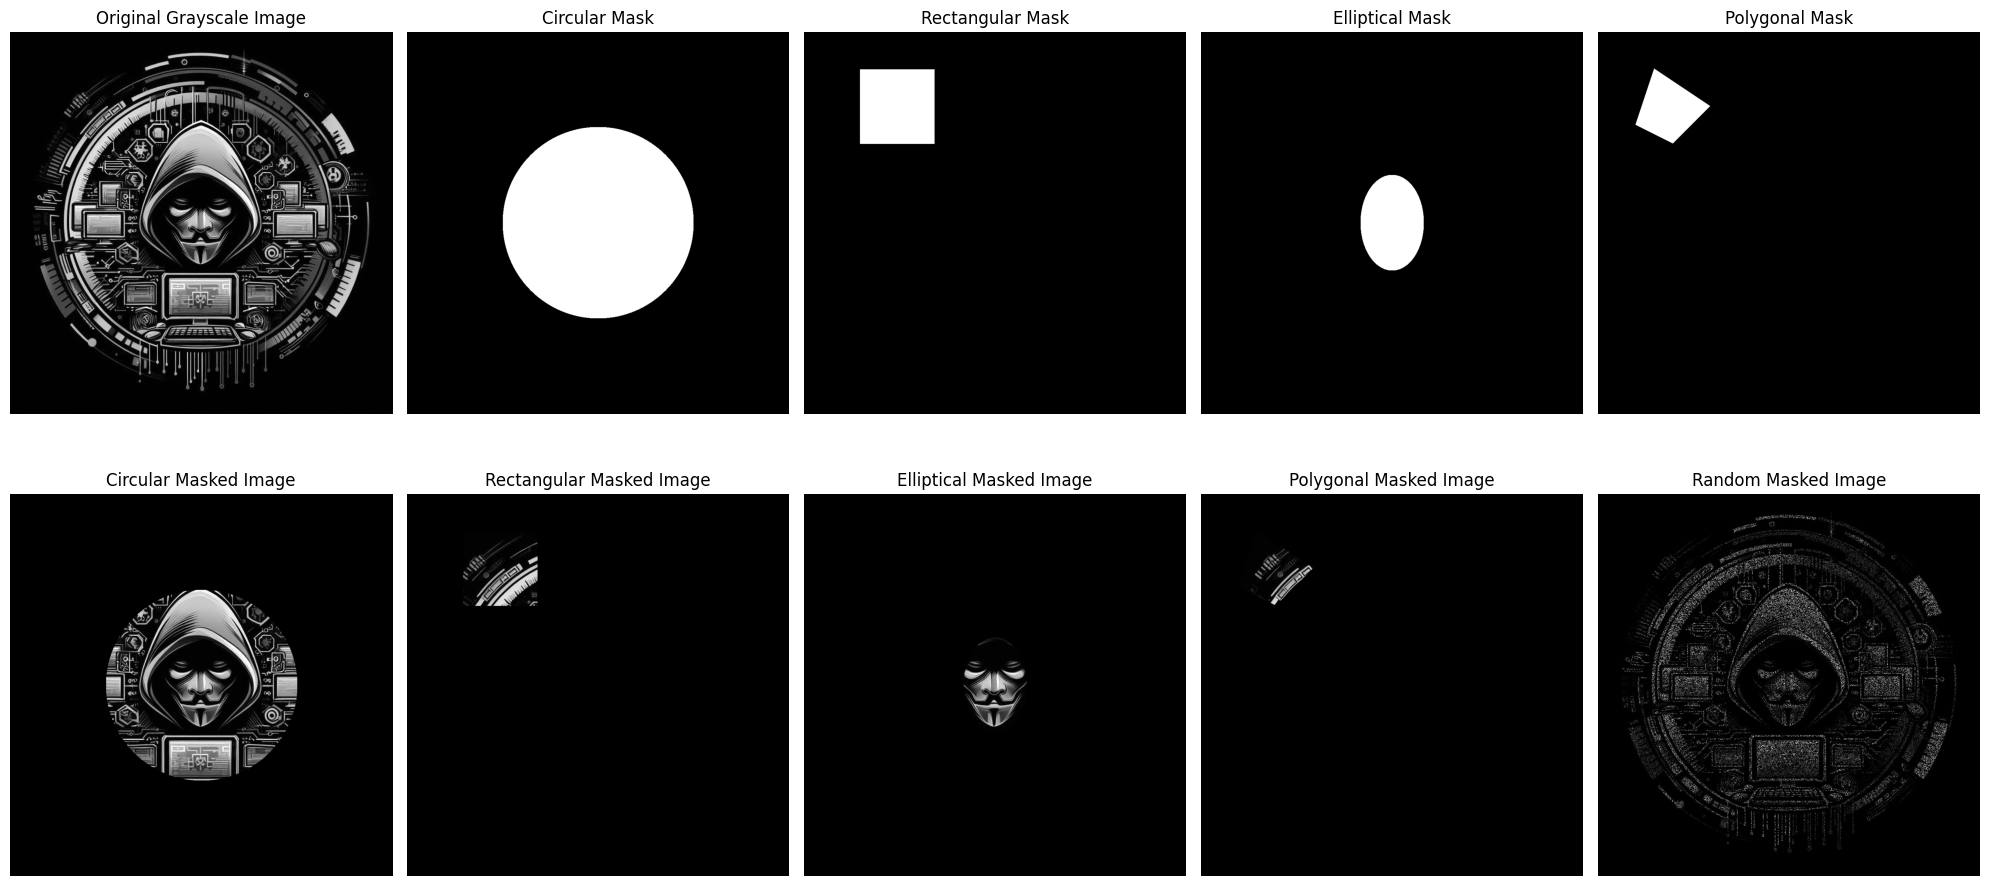

In [39]:
# Display the results
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

# Display the original grayscale image
axes[0, 0].imshow(gray_image, cmap='gray')
axes[0, 0].set_title('Original Grayscale Image')
axes[0, 0].axis('off')

# Display the Circular Mask
axes[0, 1].imshow(circular_mask, cmap='gray')
axes[0, 1].set_title('Circular Mask')
axes[0, 1].axis('off')

# Display the Rectangular Mask
axes[0, 2].imshow(rect_mask, cmap='gray')
axes[0, 2].set_title('Rectangular Mask')
axes[0, 2].axis('off')

# Display the Elliptical Mask
axes[0, 3].imshow(ellipse_mask, cmap='gray')
axes[0, 3].set_title('Elliptical Mask')
axes[0, 3].axis('off')

# Display the Polygonal Mask
axes[0, 4].imshow(polygon_mask, cmap='gray')
axes[0, 4].set_title('Polygonal Mask')
axes[0, 4].axis('off')

# Display the Circular Masked Image
axes[1, 0].imshow(circular_masked_image_uint8, cmap='gray')
axes[1, 0].set_title('Circular Masked Image')
axes[1, 0].axis('off')

# Display the Rectangular Masked Image
axes[1, 1].imshow(rectangular_masked_image_uint8, cmap='gray')
axes[1, 1].set_title('Rectangular Masked Image')
axes[1, 1].axis('off')

# Display the Elliptical Masked Image
axes[1, 2].imshow(ellipse_masked_image_uint8, cmap='gray')
axes[1, 2].set_title('Elliptical Masked Image')
axes[1, 2].axis('off')

# Display the Polygonal Masked Image
axes[1, 3].imshow(polygon_masked_image_uint8, cmap='gray')
axes[1, 3].set_title('Polygonal Masked Image')
axes[1, 3].axis('off')

# Display the Random Masked Image
axes[1, 4].imshow(random_masked_image_uint8, cmap='gray')
axes[1, 4].set_title('Random Masked Image')
axes[1, 4].axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# `Task 10: Write a python program to apply a low-pass blurring filter smooths edges and removes noise from an image using scikit-image`

In [40]:
# Apply Gaussian blur (low-pass filter) to reduce noise
sigma = 1.0  # Standard deviation for Gaussian kernel. Adjust as needed.
gaussian_blurred_image = filters.gaussian(gray_image, sigma=sigma)

In [41]:
# Apply Non-Local Means Denoising
# The patch size (5) and patch distance (6) can be adjusted based on the image and level of noise
nlm_denoised_image = restoration.denoise_nl_means(gray_image, h=0.8, patch_size=5, patch_distance=6)

In [42]:
# Convert the images to 8-bit unsigned integer format for display
gaussian_blurred_image_uint8 = util.img_as_ubyte(gaussian_blurred_image)
nlm_denoised_image_uint8 = util.img_as_ubyte(nlm_denoised_image)

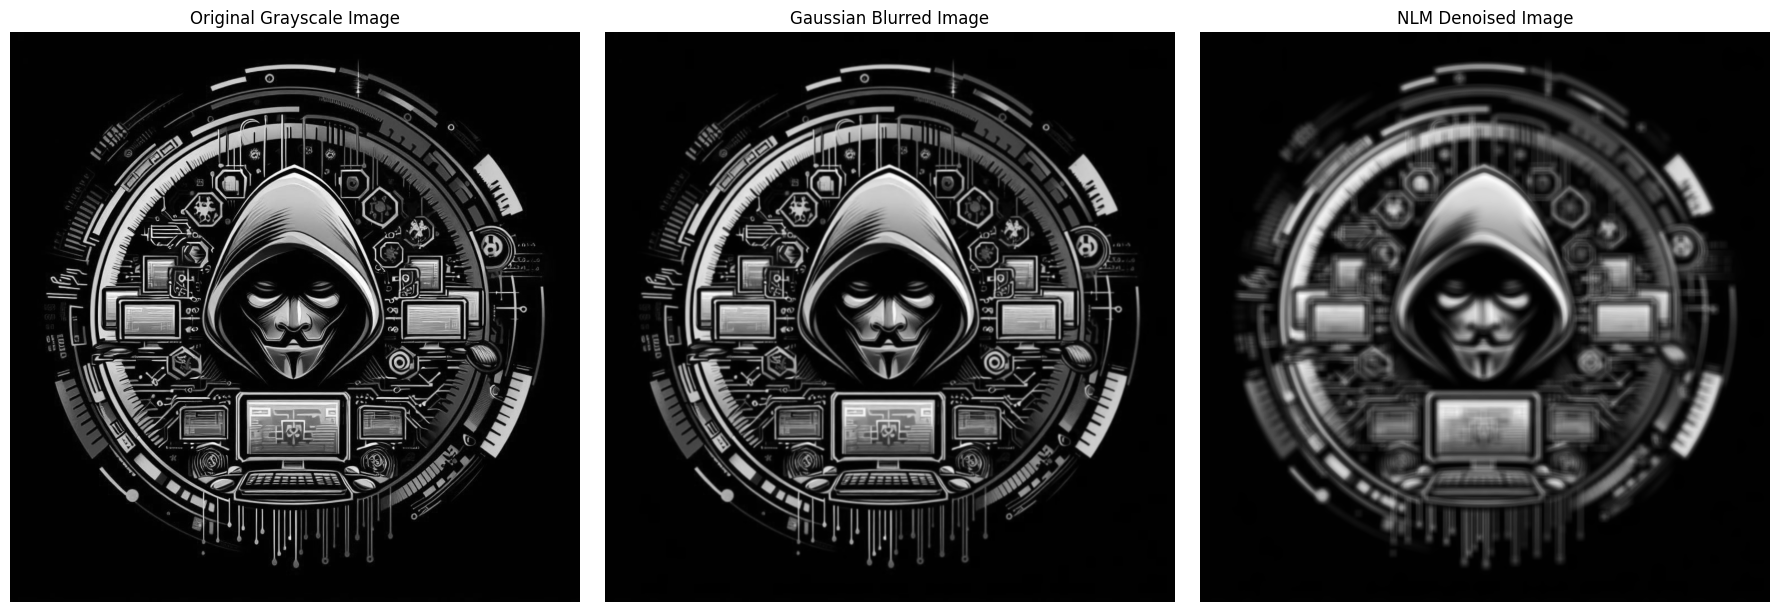

In [43]:
# Display the results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Display the original grayscale image
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Original Grayscale Image')
axes[0].axis('off')

# Display the Gaussian blurred image
axes[1].imshow(gaussian_blurred_image_uint8, cmap='gray')
axes[1].set_title('Gaussian Blurred Image')
axes[1].axis('off')

# Display the Non-Local Means denoised image
axes[2].imshow(nlm_denoised_image_uint8, cmap='gray')
axes[2].set_title('NLM Denoised Image')
axes[2].axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.show()